# Customer Churn Analysis
### Bingbing Pan

## Approach

- Data processing 
- Descriptive analysis
- Logistic Regression, feature selections, parameter tuning, and result interpretation
- Suggestions & next steps

## Key Findings

### - EDA
 - New clients are more likely to churn
 - Senior citizens are more likely to churn
 - Clients who do not have partner or dependent are more likely to churn
 - Clients who have phone service and have multiple lines are more likely to churn
 - Clients with fiber optic internet service are more likely to churn
 - Clients with no internet service have relatively lower churn rate
 - Clients who doesn't have other services (Online Security, Online Backup, Device Protection, TechSupport, StreamingTV, StreamingMovies) are more likely to churn
 - Clients with short term contract type are more likely to churn
 - Clients with paperless billing are more likely to churn
 - Clients who have payment method with Electornic Check are more likely to churn
 
### - Modeling
 - Logistic regression to predict customer churn based on clients preference and demographic information, has 78% recall score
 - Clients with short-term contract type, electronic payment method, fiber optic internet service, no other service have higher probability to churn
 - As for clients demographic information, clients who are senior citizens, and have no dependent are more likely to churn
 - Clients with 2 year contract type, no paperless billing, and multiple phone lines have the most negative relation with Churn

### Suggestions & next steps
- Utilize the result produced by logistic regression, and target the right client demographics and preference in order to get more customer churn
- Look into factors impact customer churn such as short-term contract type, electronic payment method, and mfiber optic internet service
- Include more data and factors that affect clients’ decision to improve model’s performance


### 1. Data Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
import pydotplus

In [2]:
df = pd.read_csv('/Users/bing/Desktop/COURSEWORK/BC/Playground/Dataset/8_Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.apply(lambda x: x == ' ', axis = 1).mean()

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

- Column TotalCharges contains empty string, therefore, we are going to replace the empty string with "0"
- Convert TotalCharges to numerical data type

In [7]:
df.loc[df.TotalCharges == ' ', 'TotalCharges'] = 0

In [8]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

### 2. EDA

#### 2.1 Target Variable - Churn

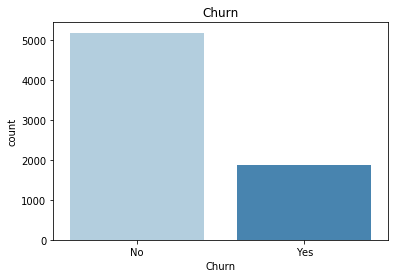

In [9]:
sns.countplot(x='Churn', data=df, palette='Blues').set_title('Churn')
plt.show()

 - About 5100 clients left the company in the previous month, and about 2000 clients stay with the company.
 

#### 2.2 Churn vs. Tenure

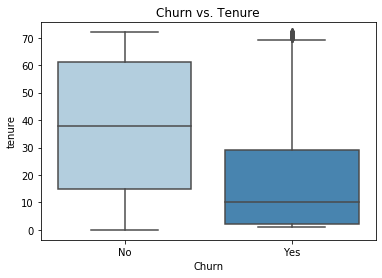

In [10]:
sns.boxplot(y='tenure', data=df, x='Churn', palette='Blues').set_title('Churn vs. Tenure')
plt.show()

- New clients are more likely to churn

#### 2.3 Churn vs. Monthly Charges

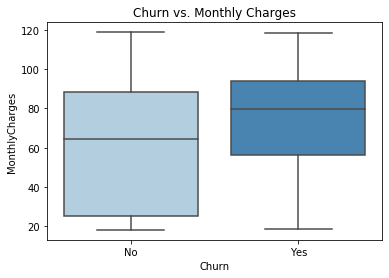

In [11]:
sns.boxplot(y='MonthlyCharges', data=df, x='Churn', palette='Blues').set_title('Churn vs. Monthly Charges')
plt.show()

- Clients with higher monthly charges are more likely to churn

#### 2.4 Churn vs. Gender


In [12]:
df['Churn_dummy'] = df.Churn.replace('No', 0).replace('Yes', 1)

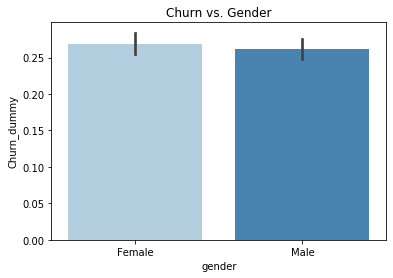

In [13]:
sns.barplot(y='Churn_dummy', data=df, x='gender',palette='Blues').set_title('Churn vs. Gender')
plt.show()

- Gender is not a determinant of churn

#### 2.4 Churn vs. Seniority

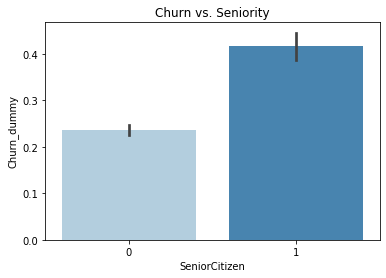

In [14]:
sns.barplot(y='Churn_dummy', data=df, x='SeniorCitizen',palette='Blues').set_title('Churn vs. Seniority')
plt.show()

- Senior citizens are more likely to churn

#### 2.5 Churn vs. Partner and Churn vs. Dependents

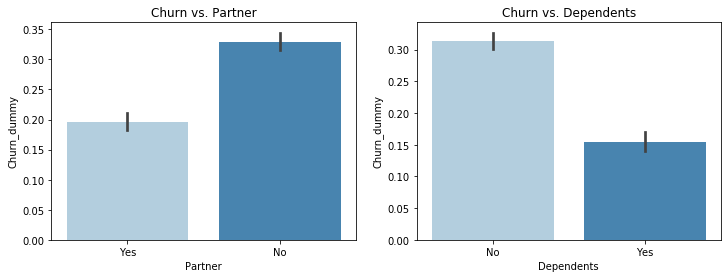

In [15]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title('Churn vs. Partner')
axis[1].set_title('Churn vs. Dependents')
sns.barplot(y='Churn_dummy', data=df, x='Partner',palette='Blues', ax=axis[0])
sns.barplot(y='Churn_dummy', data=df, x='Dependents',palette='Blues', ax=axis[1])

- Clients who do not have partner or dependent are more likely to churn

#### 2.6 Churn vs. PhoneService and Churn vs. MultipleLines

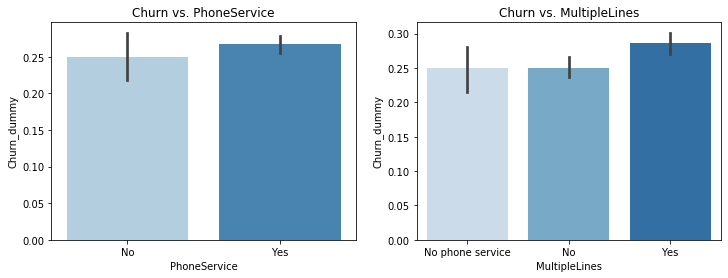

In [16]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title('Churn vs. PhoneService')
axis[1].set_title('Churn vs. MultipleLines')
sns.barplot(y='Churn_dummy', data=df, x='PhoneService',palette='Blues', ax=axis[0])
sns.barplot(y='Churn_dummy', data=df, x='MultipleLines',palette='Blues', ax=axis[1])
plt.show()

- Clients who have phone service and have multiple lines are more likely to churn

#### 2.6 Churn vs. InternetService

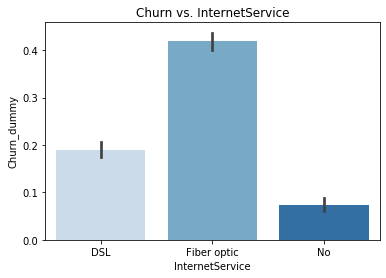

In [17]:
sns.barplot(y='Churn_dummy', data=df, x='InternetService',palette='Blues').set_title('Churn vs. InternetService')
plt.show()

- Clients with fiber optic internet service are more likely to churn
- Clients with no internet service have relatively lower churn rate

#### 2.7 Churn vs. Other Services

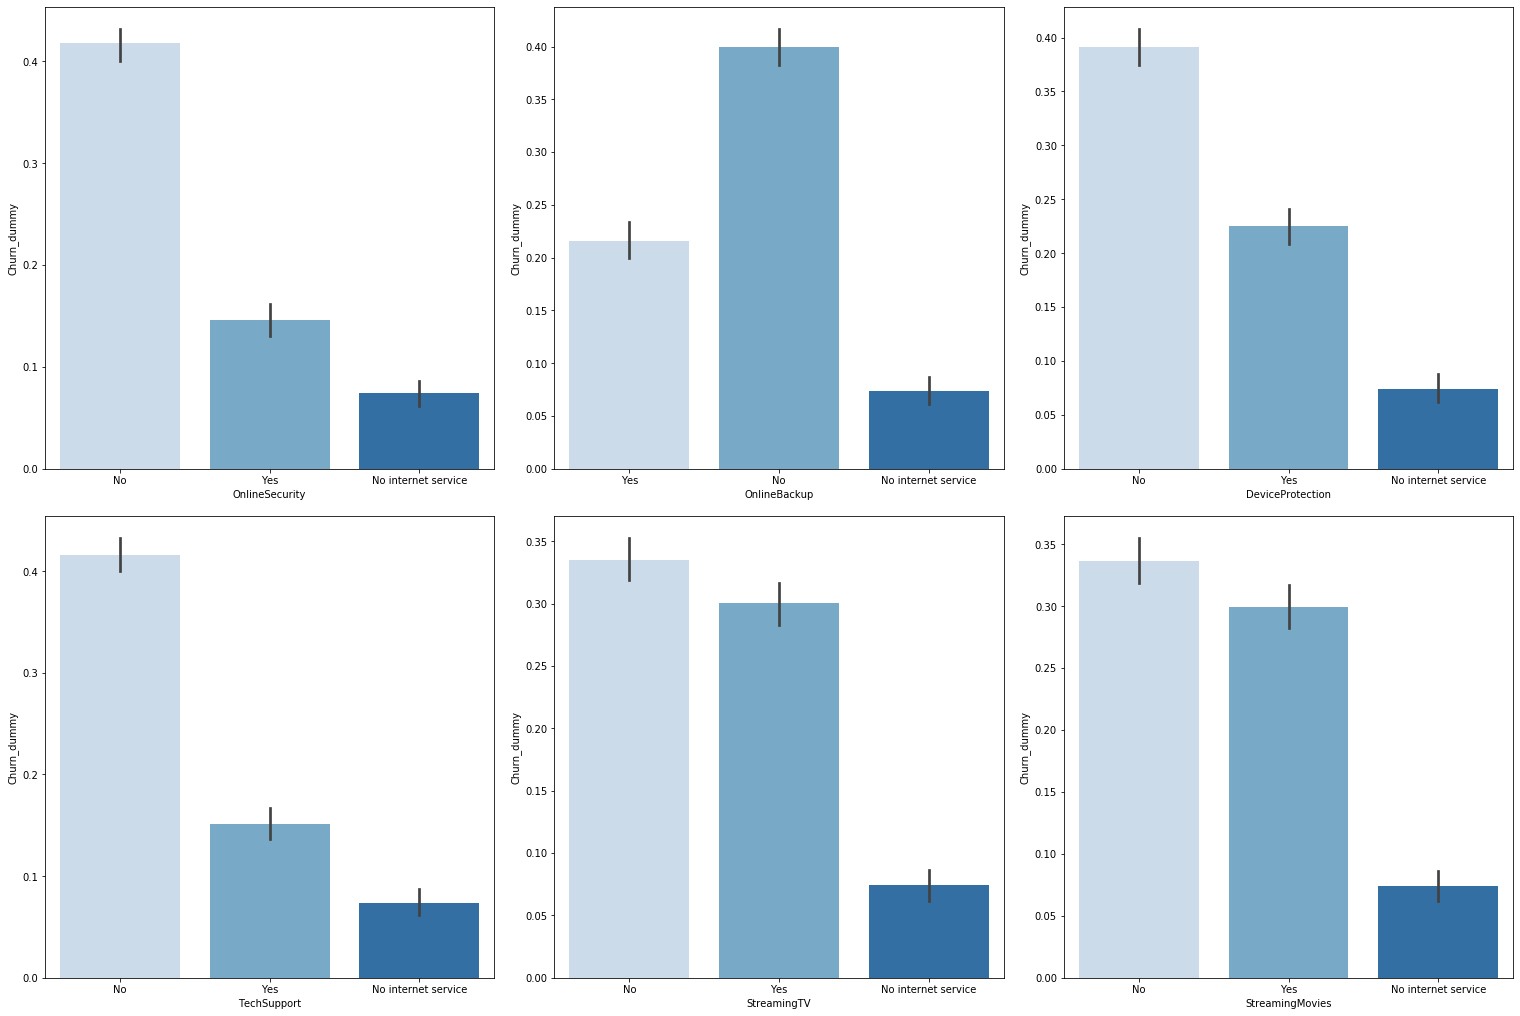

In [18]:
other_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
num_plots = len(other_services)
total_cols = 3
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(other_services):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.barplot(y='Churn_dummy',x=var, data=df, ax=axs[row][pos], palette='Blues')

- Clients who doesn't have other services (Online Security, Online Backup, Device Protection, TechSupport, StreamingTV, StreamingMovies) are more likely to churn

#### 2.8 Churn vs. Contract

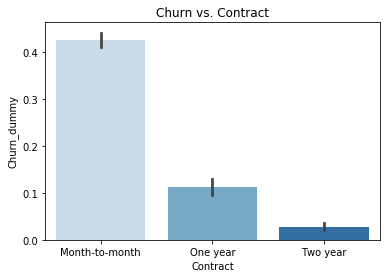

In [19]:
sns.barplot(y='Churn_dummy', data=df, x='Contract',palette='Blues').set_title('Churn vs. Contract')
plt.show()

- Clients with short term contract type are more likely to churn

#### 2.9 Churn vs. PaperlessBilling and Churn vs. PaymentMethod

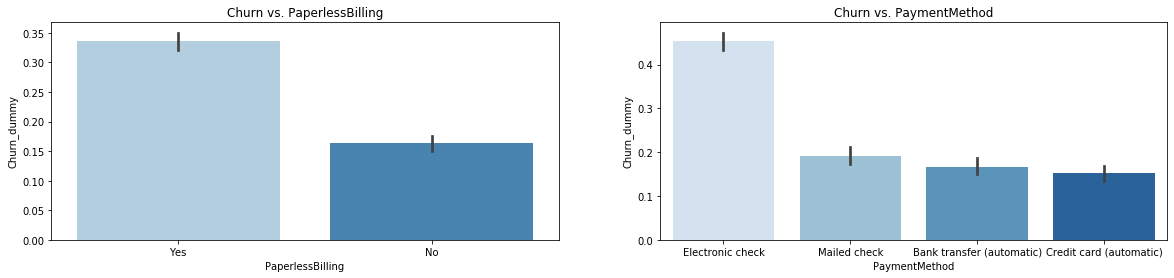

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(20,4))
axis[0].set_title('Churn vs. PaperlessBilling')
axis[1].set_title('Churn vs. PaymentMethod')
sns.barplot(y='Churn_dummy', data=df, x='PaperlessBilling',palette='Blues', ax=axis[0])
sns.barplot(y='Churn_dummy', data=df, x='PaymentMethod',palette='Blues', ax=axis[1])
plt.show()

- Clients with paperless billing are more likely to churn
- Clients who have payment method with Electornic Check are more likely to churn

### 3. Data Modeling

#### 3.1 Data Preparation

In [50]:
df1 = df.copy()

In [51]:
x = df1.drop(columns = ['customerID', 'Churn_dummy', 'Churn'])
x = pd.get_dummies(x)
x = x.drop(columns = ['gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No'])

In [52]:
y = df1['Churn_dummy']

-  Drop redundant columns (for features with two unique values)

#### 3.2 Logistic Regression

##### 3.2.1 Feature Selections

In [43]:
threshold = 0.90
corr_matrix = x.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))
print(list(to_drop))

There are 7 columns to remove.
['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']


In [44]:
x_lr = x.drop(columns = to_drop)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=50, stratify=y, train_size=0.8)

In [54]:
lr = LogisticRegression(class_weight='balanced')

- Remove features that are highly correlated with each other to prevent multicollinearity issue
- Since 5100 clients left the company in the previous month, and about 2000 clients stay with the company, the dataset is very imbalanced and we need to adjust the class_weight to ensure better performance

##### 3.2.2 GridSearch & Parameter Tuning

In [55]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [56]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5, scoring='recall')
cv.fit(X_train, y_train)

print_results(cv)
cv.best_estimator_

BEST PARAMS: {'C': 1}

0.771 (+/-0.032) for {'C': 0.001}
0.795 (+/-0.021) for {'C': 0.01}
0.801 (+/-0.023) for {'C': 0.1}
0.804 (+/-0.021) for {'C': 1}
0.804 (+/-0.021) for {'C': 10}
0.803 (+/-0.024) for {'C': 100}
0.802 (+/-0.023) for {'C': 1000}


LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
best_lgr = cv.best_estimator_
y_pred = best_lgr.predict(X_test)
print(recall_score(y_test,y_pred))

0.7834224598930482


- We are more interested in the clients who are churn, so recall score is an appropriate metric in cross validation and measuring generalization ability
- The bset model has a recall score of 0.78 on testing dataset

##### 3.2.3 Model Result Interpretation

In [31]:
Coeffient = best_lgr.coef_.flatten()
pd.DataFrame({'Coeffient':Coeffient}, index=x_lr.columns).sort_values(by='Coeffient', ascending=False)

,Coeffient
Contract_Month-to-month,0.560443
InternetService_Fiber optic,0.344489
PhoneService_No,0.333028
SeniorCitizen,0.258807
PaymentMethod_Electronic check,0.249053
OnlineSecurity_No,0.231077
TechSupport_No,0.229292
Dependents_No,0.192205
OnlineBackup_No,0.164715
StreamingMovies_Yes,0.111961


- As indicated in EDA, clients with short-term contract type, electronic payment method, fiber optic internet service, no other service have higher probability to churn 
- As for clients demographic information, clients who are senior citizens, and have no dependent are more likely to churn
- Clients with 2 year contract type, no paperless billing, and multiple phone lines have the most negative relation with Churn

### 4. Suggestions & Next Steps

- Utilize the result produced by logistic regression, and target the right client demographics and preference in order to get more customer churn
- Look into factors impact customer churn such as short-term contract type, electronic payment method, and mfiber optic internet service
- Include more data and factors that affect clients’ decision to improve model’s performance